## 初探数据

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong']
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
from pandas import Series,DataFrame

In [2]:
data_train = pd.read_csv("train.csv",engine="python",encoding="UTF-8")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 存活人数
data_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# 数值型数据协方差,corr()函数-快速了解个数据的相关性
## 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
data_train_corr = data_train.drop("PassengerId",axis=1).corr()
data_train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


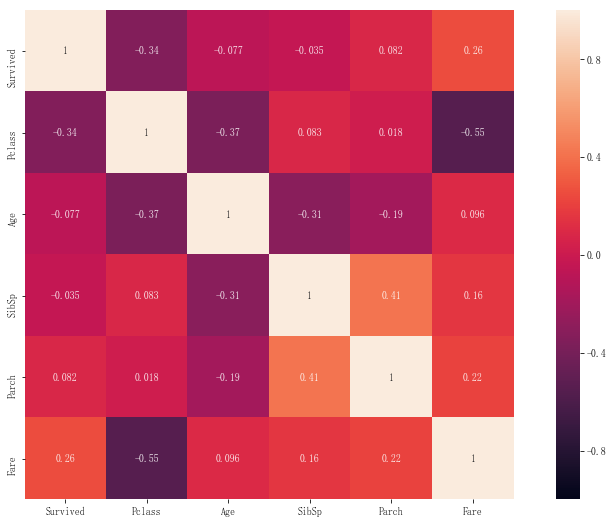

In [7]:
# 画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(data_train_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

#### 各个数据与结果的关系

In [8]:
# ① Pclass,乘客等级,1是最高级
# 结果分析:可以看出Survived和Pclass在Pclass=1的时候有较强的相关性（>0.5），所以最终模型中包含该特征。
data_train.groupby(["Pclass"])["Pclass","Survived"].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


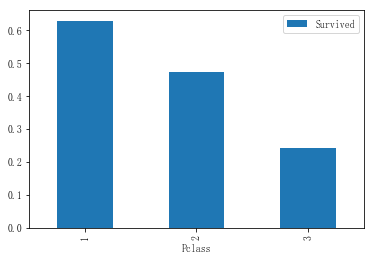

In [9]:
data_train[["Pclass","Survived"]].groupby(["Pclass"]).mean().plot.bar()

In [10]:
# ② Sex,性别
# 结果分析:女性有更高的活下来的概率（74%）,保留该特征
data_train.groupby(["Sex"])["Sex","Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


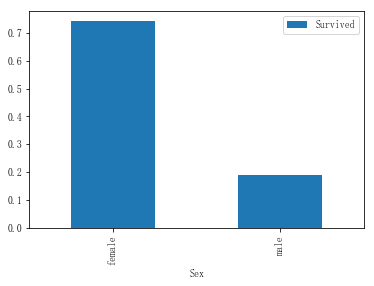

In [11]:
data_train[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar()

In [12]:
# ③ SibSp and Parch 兄妹配偶数/父母子女数
# 结果分析:这些特征与特定的值没有相关性不明显，最好是由这些独立的特征派生出一个新特征或者一组新特征
data_train[["SibSp","Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


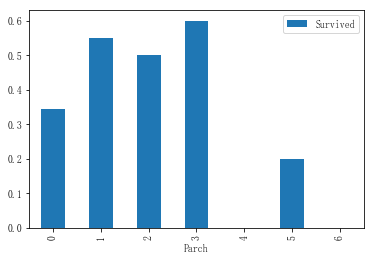

In [13]:
data_train[["Parch","Survived"]].groupby(["Parch"]).mean().plot.bar()

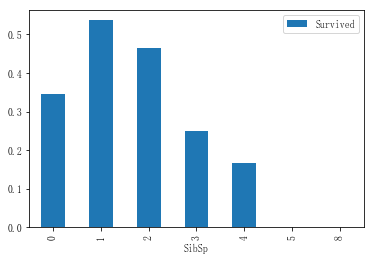

In [14]:
data_train[["SibSp","Survived"]].groupby(["SibSp"]).mean().plot.bar()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


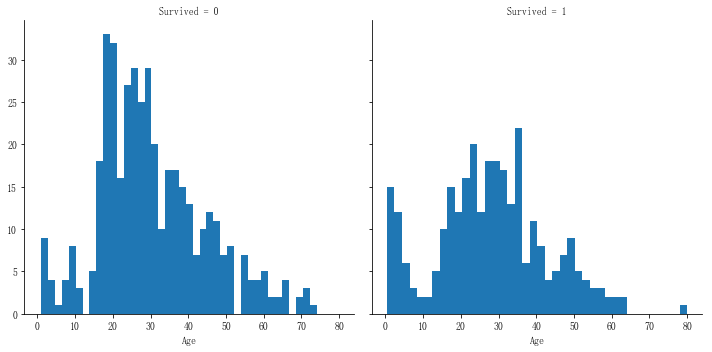

In [15]:
# ④ Age年龄与生存情况的分析.
# 结果分析:由图,可以看到年龄是影响生存情况的.
# 但是年龄是有大部分缺失值的,缺失值需要进行处理,可以使用填充或者模型预测.
g = sns.FacetGrid(data_train, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=40)

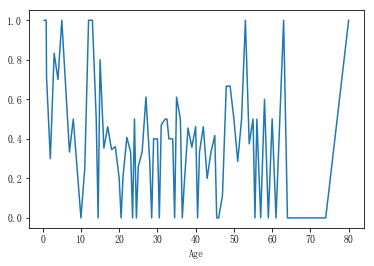

In [16]:
data_train.groupby(['Age'])['Survived'].mean().plot()

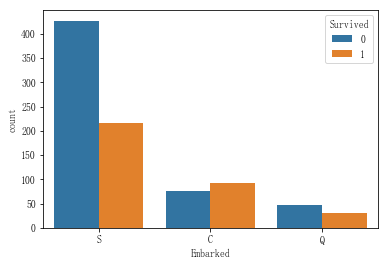

In [17]:
# ⑤ Embarked登港港口与生存情况的分析
# 结果分析:C地的生存率更高,这个也应该保留为模型特征.
sns.countplot('Embarked',hue='Survived',data=data_train)

# 简单数据预处理
### 先对最突出的数据属性进行预处理:Cabin和Age

#### Cabin==按Cabin有无数据,将这个属性处理成Yes和No两种类型
#### Age==用scikit-learn中的RandomForest来拟合一下缺失的年龄数据
#### Embarked==分析缺失登船口的乘客信息，找到与最接近的登船口进行填充
* 1.如果缺值的样本占总数比例极高,我们可能就直接舍弃了,作为 特征加入的话,可能反倒带入noise,影响最后的结果了. 
* 2.如果缺值的样本适中,而该属性非连续值特征属性(比如说类目属性),那就把NaN作为一个新类别,加到类别特征中 
* 3.如果缺值的样本适中,而该属性为连续值特征属性,有时候我们会考虑给定一个step(比如这里的age,我们可以考虑每隔2/3岁为一个步长),然后把它离散化,之后把NaN作为一个type加到属性类目中.   
* 4.有些情况下,缺失的值个数并不是特别多,那我们也可以试着根据已有的值,拟合一下数据,补充上.  本例中,后两种处理方式应该都是可行的,我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

In [18]:
from sklearn.ensemble import RandomForestRegressor

# 使用RandomForestClassifier填补缺失的年龄属性
def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进RandomForestRegressor中
    age_df = df[["Age","Fare","Parch","SibSp","Pclass"]]
    # 将乘客分为已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    # y即目标年龄
    y = known_age[:,0]
    # x即特征属性值
    X = known_age[:,1:]
    # 用RandomForestRegressor进行训练
    rfr = RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行对未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:,1:])
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()),"Age"] = predictedAges
    return df,rfr
data_train_copy = data_train.copy()
data_train_copy,rfr = set_missing_ages(data_train_copy)
data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
# 填充Embarked缺失值
data_train_copy.loc[(data_train_copy.Embarked.isnull()),"Embarked"] = "C"
data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


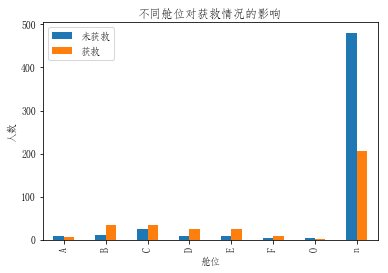

In [20]:
# Cabin缺失值的处理
train_cabin_first = []
for tmp_cabin in data_train_copy.Cabin.values:
    train_cabin_first.append(str(tmp_cabin)[0])
data_train_copy["Cabin_first"] = train_cabin_first
data_train_copy.loc[data_train_copy.Cabin_first == "G","Cabin_first"] = "O"
data_train_copy.loc[data_train_copy.Cabin_first == "T","Cabin_first"] = "O"
Survived_0 = data_train_copy.Cabin_first[data_train_copy.Survived == 0].value_counts()
Survived_1 = data_train_copy.Cabin_first[data_train_copy.Survived == 1].value_counts()
title_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
title_df.plot(kind="bar")
plt.title(u"不同舱位对获救情况的影响")
plt.xlabel(u"舱位")
plt.ylabel(u"人数")
plt.show()

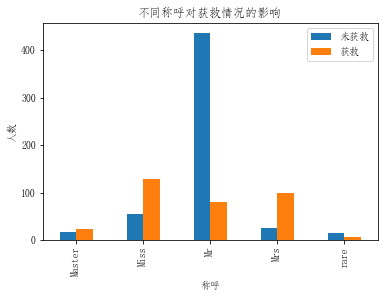

In [21]:
# 对Name属性进行预处理
import re
regex = re.compile("(.*, )|(\\..*)")
title = []
for name in data_train_copy.Name.values:
    title.append(re.sub(regex,'',name))
data_train_copy["title"] = title
data_train_copy.loc[data_train_copy.title == "Mlle","title"] = "Miss"
data_train_copy.loc[data_train_copy.title == "Ms","title"] = "Miss"
data_train_copy.loc[data_train_copy.title == "Mme","title"] = "Mrs"
common = ["Mr","Miss","Mrs","Master"]
data_train_copy.loc[~data_train_copy.title.isin(common),"title"] = "rare"
Survived_0 = data_train_copy.title[data_train_copy.Survived == 0].value_counts()
Survived_1 = data_train_copy.title[data_train_copy.Survived == 1].value_counts()
title_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
title_df.plot(kind="bar")
plt.title(u"不同称呼对获救情况的影响")
plt.xlabel(u"称呼")
plt.ylabel(u"人数")
plt.show()

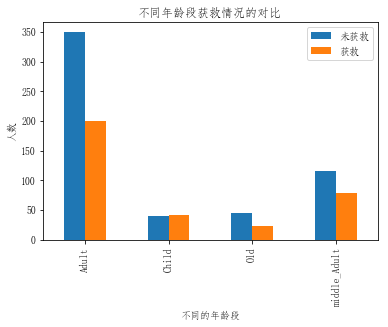

In [22]:
# 对age进行离散化
data_train_copy.loc[data_train_copy.Age <= 12,"Age_type"] = "Child"
data_train_copy.loc[(data_train_copy.Age > 12) & (data_train_copy.Age <=35),"Age_type"] = "Adult"
data_train_copy.loc[(data_train_copy.Age > 35) & (data_train_copy.Age <=50),"Age_type"] = "middle_Adult"
data_train_copy.loc[data_train_copy.Age > 50,"Age_type"] = "Old"
Survived_0 = data_train_copy.Age_type[data_train_copy.Survived == 0].value_counts()
Survived_1 = data_train_copy.Age_type[data_train_copy.Survived == 1].value_counts()
age_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
age_df.plot(kind="bar")
plt.title(u"不同年龄段获救情况的对比")
plt.xlabel(u"不同的年龄段")
plt.ylabel(u"人数")
plt.show()

In [23]:
# 不同年龄段的获救的概率
data_train_copy[["Age_type","Survived"]].groupby(["Age_type"]).mean()

,Survived
Age_type,
Adult,0.363139
Child,0.506173
Old,0.338235
middle_Adult,0.407216


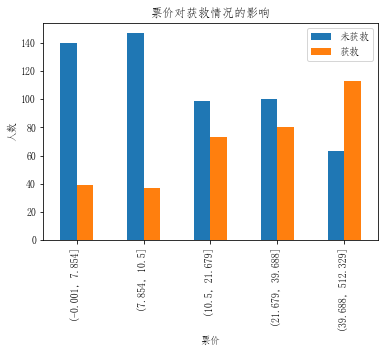

In [24]:
# 对Fare进行离散化
data_train_copy['Fare_bin'] = pd.qcut(data_train_copy['Fare'], 5)
Survived_0 = data_train_copy.Fare_bin[data_train_copy.Survived == 0].value_counts()
Survived_1 = data_train_copy.Fare_bin[data_train_copy.Survived == 1].value_counts()
fare_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
fare_df.plot(kind="bar")
plt.title(u"票价对获救情况的影响")
plt.xlabel(u"票价")
plt.ylabel(u"人数")
plt.show()

In [25]:
# 增加family_size属性
data_train_copy["family_size"] = data_train_copy["SibSp"] + data_train_copy["Parch"] + 1
data_train_copy[["family_size","Survived"]].groupby(["family_size"]).mean()

,Survived
family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [26]:
# 对family_size进行离散化
data_train_copy.loc[data_train_copy.family_size == 1,"family_type"] = "single"
data_train_copy.loc[data_train_copy.family_size.isin([2,4]),"family_type"] = "middle"
data_train_copy.loc[data_train_copy.family_size > 4,"family_type"] = "big"
data_train_copy[["family_type","Survived"]].groupby(["family_type"]).mean()

,Survived
family_type,
big,0.161290
middle,0.578947
single,0.303538


In [27]:
# 对family_type,Fare_bin,Cabin_first,Embarked,Age_type,title,sex,Pclass进行独热编码
dummies_sex = pd.get_dummies(data_train_copy["Sex"],prefix="Sex")
dummies_pclass = pd.get_dummies(data_train_copy["Pclass"],prefix="Pclass")
dummies_title = pd.get_dummies(data_train_copy["title"],prefix="title")
dummies_age = pd.get_dummies(data_train_copy["Age_type"],prefix="Age_type")
dummies_embarked = pd.get_dummies(data_train_copy["Embarked"],prefix="Embarked")
dummies_cabin = pd.get_dummies(data_train_copy["Cabin_first"],prefix="Cabin_first")
dummies_fare = pd.get_dummies(data_train_copy["Fare_bin"],prefix="Fare_bin")
dummies_family = pd.get_dummies(data_train_copy["family_type"],prefix="family_type")
train_df = pd.concat([data_train_copy,dummies_sex,dummies_pclass,dummies_title,dummies_age,dummies_embarked,dummies_cabin,dummies_fare,dummies_family],axis=1)
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_first', 'title',
       'Age_type', 'Fare_bin', 'family_size', 'family_type', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'title_Master',
       'title_Miss', 'title_Mr', 'title_Mrs', 'title_rare', 'Age_type_Adult',
       'Age_type_Child', 'Age_type_Old', 'Age_type_middle_Adult', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_first_A', 'Cabin_first_B',
       'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E', 'Cabin_first_F',
       'Cabin_first_O', 'Cabin_first_n', 'Fare_bin_(-0.001, 7.854]',
       'Fare_bin_(7.854, 10.5]', 'Fare_bin_(10.5, 21.679]',
       'Fare_bin_(21.679, 39.688]', 'Fare_bin_(39.688, 512.329]',
       'family_type_big', 'family_type_middle', 'family_type_single'],
      dtype='object')

In [42]:
# 选取训练集
X_train_df = train_df.filter(regex="Survived|SibSp|Parch|Sex_.*|Pclass_.*|title_.*|Age_type_.*|Embarked_.*|Cabin_first_.*|Fare_bin_.*|family_type_.*")
X_train = X_train_df.values
X = X_train[:,1:]
y = X_train[:,0:1]
X.shape,y.shape

((891, 35), (891, 1))

In [43]:
# 构建训练模型
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import *

parameters = {  
    "n_estimators": [100,200,300],  
    "max_depth":[5,6,7,8],
    "min_samples_leaf": [1,2,3],  
    "min_samples_split": [5,6,7,8],
    "max_features":["sqrt"]
}
RF_estimator = RandomForestClassifier(random_state=0, n_estimators=2000, n_jobs=-1)
grid_search = GridSearchCV(RF_estimator, param_grid=parameters, scoring='roc_auc', cv=10)
grid_search.fit(X = X,y = y)
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([0.61253743, 0.27303472, 0.41185377, 0.15400269, 0.27672942,
         0.40435598, 0.15630217, 0.27423327, 0.40636392, 0.15640378,
         0.27303607, 0.40515606, 0.15519829, 0.27423396, 0.42164962,
         0.15920291, 0.27402966, 0.41425364, 0.15690374, 0.2744334 ,
         0.40106025, 0.16529772, 0.27892902, 0.41325407, 0.15710201,
         0.27413337, 0.42855077, 0.15580237, 0.27493589, 0.41465271,
         0.16110213, 0.27363536, 0.39826188, 0.16099896, 0.27683315,
         0.41545351, 0.15669842, 0.28023057, 0.43014505, 0.16519346,
         0.37168686, 0.54408898, 0.17759213, 0.31112061, 0.56417751,
         0.18528888, 0.29842443, 0.47622561, 0.1774977 , 0.31031978,
         0.42425277, 0.16170516, 0.27923498, 0.42624323, 0.16380062,
         0.35119584, 0.44803636, 0.19528568, 0.32750051, 0.47022529,
         0.16549585, 0.28452525, 0.48911588, 0.1698966 , 0.32460964,
         0.50620787, 0.17938914, 0.29962006, 0.45613663, 0.17459321,
         0.320808

In [30]:
# 绘制学习曲线
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10, n_jobs=1,
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

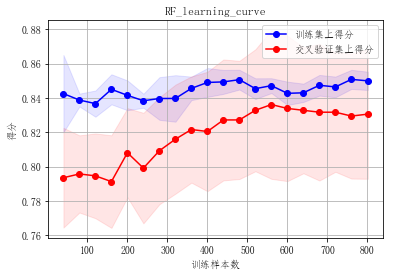

(0.8240799219617269, 0.06235564958599071)

In [44]:
# 绘制随机森林的学习曲线
clf_RF = RandomForestClassifier(random_state=0, n_estimators=100,max_depth=7, min_samples_leaf=3,min_samples_split=7,max_features='sqrt',n_jobs=-1)
clf_RF.fit(X=X,y=y)
plot_learning_curve(estimator=clf_RF,title="RF_learning_curve",X=X,y=y)

In [32]:
# 对测试集进行与训练集相同的处理
data_test = pd.read_csv("test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
data_test_copy = data_test.copy()
tmp_df = data_test_copy[["Age","Fare","Parch","SibSp","Pclass"]]
null_age = tmp_df[data_test_copy.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test_copy.loc[(data_test_copy.Age.isnull()),"Age"] = predictedAges
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
# 对Fare属性进行填充
fare_mean = data_test_copy.Fare.mean()
data_test_copy.loc[(data_test_copy.Fare.isnull()),"Fare"] = fare_mean
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
# 对Cabin提取首字母
test_cabin_first = []
for tmp_cabin in data_test_copy.Cabin.values:
    test_cabin_first.append(str(tmp_cabin)[0])
data_test_copy["Cabin_first"] = test_cabin_first
data_test_copy.loc[data_test_copy.Cabin_first == "G","Cabin_first"] = "O"
data_test_copy.loc[data_test_copy.Cabin_first == "T","Cabin_first"] = "O"
data_test_copy.Cabin_first.value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
O      1
Name: Cabin_first, dtype: int64

In [36]:
# 对Name属性进行提取称呼
import re
regex = re.compile("(.*, )|(\\..*)")
title = []
for name in data_test_copy.Name.values:
    title.append(re.sub(regex,'',name))
data_test_copy["title"] = title
data_test_copy.loc[data_test_copy.title == "Mlle","title"] = "Miss"
data_test_copy.loc[data_test_copy.title == "Ms","title"] = "Miss"
data_test_copy.loc[data_test_copy.title == "Mme","title"] = "Mrs"
common = ["Mr","Miss","Mrs","Master"]
data_test_copy.loc[~data_test_copy.title.isin(common),"title"] = "rare"
data_test_copy.title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
rare        6
Name: title, dtype: int64

In [37]:
# 构建新的family_size特征
data_test_copy["family_size"] = data_test_copy["SibSp"] + data_test_copy["Parch"] + 1
data_test_copy.loc[data_test_copy.family_size == 1,"family_type"] = "single"
data_test_copy.loc[data_test_copy.family_size.isin([2,4]),"family_type"] = "middle"
data_test_copy.loc[data_test_copy.family_size > 4,"family_type"] = "big"
data_test_copy.family_type.value_counts()

single    253
middle     88
big        20
Name: family_type, dtype: int64

In [38]:
# 对Fare进行离散化
data_test_copy['Fare_bin'] = pd.qcut(data_test_copy['Fare'], 5)
data_test_copy.Fare_bin.value_counts()

(11.342, 21.679]    85
(-0.001, 7.796]     85
(46.34, 512.329]    84
(21.679, 46.34]     82
(7.796, 11.342]     82
Name: Fare_bin, dtype: int64

In [39]:
# 对Age进行离散化
data_test_copy.loc[data_test_copy.Age <= 12,"Age_type"] = "Child"
data_test_copy.loc[(data_test_copy.Age > 12) & (data_test_copy.Age <= 35),"Age_type"] = "Adult"
data_test_copy.loc[(data_test_copy.Age > 35) & (data_test_copy.Age <= 50),"Age_type"] = "middleAdult"
data_test_copy.loc[data_test_copy.Age > 50,"Age_type"] = "Old"
data_test_copy.Age_type.value_counts()

Adult          258
middleAdult    101
Old             33
Child           26
Name: Age_type, dtype: int64

In [40]:
data_test_copy.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_first', 'title',
       'family_size', 'family_type', 'Fare_bin', 'Age_type'],
      dtype='object')

In [41]:
# 对family_type,Fare_bin,Cabin_first,Embarked,Age_type,title,sex,Pclass进行独热编码
dummies_sex = pd.get_dummies(data_test_copy["Sex"],prefix="Sex")
dummies_pclass = pd.get_dummies(data_test_copy["Pclass"],prefix="Pclass")
dummies_title = pd.get_dummies(data_test_copy["title"],prefix="title")
dummies_age = pd.get_dummies(data_test_copy["Age_type"],prefix="Age_type")
dummies_embarked = pd.get_dummies(data_test_copy["Embarked"],prefix="Embarked")
dummies_cabin = pd.get_dummies(data_test_copy["Cabin_first"],prefix="Cabin_first")
dummies_fare = pd.get_dummies(data_test_copy["Fare_bin"],prefix="Fare_bin")
dummies_family = pd.get_dummies(data_test_copy["family_type"],prefix="family_type")
test_df = pd.concat([data_test_copy,dummies_sex,dummies_pclass,dummies_title,dummies_age,dummies_embarked,dummies_cabin,dummies_fare,dummies_family],axis=1)
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_first', 'title',
       'family_size', 'family_type', 'Fare_bin', 'Age_type', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'title_Master',
       'title_Miss', 'title_Mr', 'title_Mrs', 'title_rare', 'Age_type_Adult',
       'Age_type_Child', 'Age_type_Old', 'Age_type_middleAdult', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_first_A', 'Cabin_first_B',
       'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E', 'Cabin_first_F',
       'Cabin_first_O', 'Cabin_first_n', 'Fare_bin_(-0.001, 7.796]',
       'Fare_bin_(7.796, 11.342]', 'Fare_bin_(11.342, 21.679]',
       'Fare_bin_(21.679, 46.34]', 'Fare_bin_(46.34, 512.329]',
       'family_type_big', 'family_type_middle', 'family_type_single'],
      dtype='object')

In [45]:
X_test_df = test_df.filter(regex="SibSp|Parch|Sex_.*|Pclass_|title_.*|Age_type_.*|Embarked_.*|Cabin_first_.*|Fare_bin_.*|family_type_.*")
X_test = X_test_df.values
X_test.shape

(418, 35)

In [46]:
predictions = clf_RF.predict(X_test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("RF_predictions_01.csv", index=False)

In [60]:
X_train_df = train_df.filter(regex="Survived|Sex_.*|Pclass_.*|title_.*|Age_type_.*|Embarked_.*|Cabin_first_.*|Fare_bin_.*|family_type_.*")
X_train = X_train_df.values
X = X_train[:,1:]
y = X_train[:,0:1]
X.shape,y.shape

((891, 33), (891, 1))

In [61]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import *

parameters = {  
    "n_estimators": [100,200,300],  
    "max_depth":[5,6,7,8],
    "min_samples_leaf": [1,2,3],  
    "min_samples_split": [5,6,7,8],
    "max_features":["sqrt"]
}
RF_estimator = RandomForestClassifier(random_state=0, n_estimators=2000, n_jobs=-1)
grid_search = GridSearchCV(RF_estimator, param_grid=parameters, scoring='roc_auc', cv=10)
grid_search.fit(X = X,y = y)
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([1.90425007, 0.32690873, 0.4377418 , 0.165797  , 0.31621704,
         0.64042933, 0.20307763, 0.31730716, 0.64052916, 0.16510103,
         0.2916307 , 0.48231826, 0.16579893, 0.3366003 , 0.41236036,
         0.13950846, 0.30372589, 0.48151653, 0.14591086, 0.27773311,
         0.49281628, 0.15450501, 0.32260826, 0.40165675, 0.13971205,
         0.25844774, 0.38876708, 0.14281578, 0.25784063, 0.38957376,
         0.15190692, 0.32261019, 0.40576551, 0.16409817, 0.47622395,
         0.44123957, 0.18828635, 0.32321377, 0.44573271, 0.16260061,
         0.30621548, 0.56457465, 0.19928048, 0.30842233, 0.42784717,
         0.27444482, 0.38018117, 0.49730918, 0.17598915, 0.39307528,
         0.53549361, 0.15869591, 0.27663021, 0.4181551 , 0.18139591,
         0.28262501, 0.42964189, 0.16389616, 0.3108211 , 0.38676682,
         0.14590592, 0.27803476, 0.38657231, 0.14940584, 0.35639286,
         0.41006384, 0.14709861, 0.26613553, 0.44714217, 0.15520365,
         0.268240

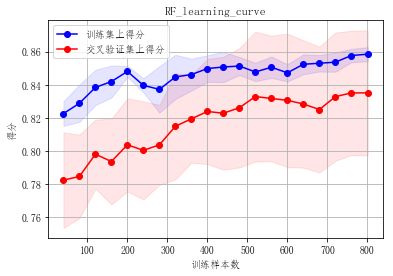

(0.8299318184194706, 0.06558188153014022)

In [62]:
# 绘制随机森林的学习曲线
clf_RF_opt = RandomForestClassifier(random_state=0, n_estimators=300,max_depth=8, min_samples_leaf=3,min_samples_split=5,max_features='sqrt',n_jobs=-1)
clf_RF_opt.fit(X=X,y=y)
clf_RF_opt.feature_importances_
plot_learning_curve(estimator=clf_RF_opt,title="RF_learning_curve",X=X,y=y)

In [88]:
clf_RF_opt.feature_importances_

array([1.27623623e-01, 1.49673786e-01, 3.80554280e-02, 2.22030146e-02,
       7.22667649e-02, 1.54475179e-02, 4.28671309e-02, 2.03648175e-01,
       3.20419370e-02, 7.72301617e-03, 1.17159179e-02, 1.92238118e-02,
       6.50682033e-03, 8.10637289e-03, 1.35859004e-02, 6.04251922e-03,
       1.57818857e-02, 2.18758763e-03, 4.70597268e-03, 3.98397312e-03,
       4.69951321e-03, 8.25031124e-03, 5.49623537e-04, 1.38758386e-04,
       3.95293996e-02, 9.09259935e-03, 1.05260869e-02, 1.36688468e-02,
       1.50873848e-02, 2.69257117e-02, 3.96891833e-02, 1.26764805e-02,
       1.57749462e-02])

In [89]:
X_train_df = train_df.filter(regex="Survived|Sex_.*|Pclass_.*|title_.*|Age_type_.*|Cabin_first_.*|Fare_bin_.*|family_type_.*")
X_train = X_train_df.values
X = X_train[:,1:]
y = X_train[:,0:1]
X.shape,y.shape

((891, 30), (891, 1))

In [90]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import *

parameters = {  
    "n_estimators": [100,200,300],  
    "max_depth":[5,6,7,8],
    "min_samples_leaf": [1,2,3],  
    "min_samples_split": [5,6,7,8],
    "max_features":["sqrt"]
}
RF_estimator = RandomForestClassifier(random_state=0, n_estimators=2000, n_jobs=-1)
grid_search = GridSearchCV(RF_estimator, param_grid=parameters, scoring='roc_auc', cv=10)
grid_search.fit(X = X,y = y)
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([0.65671537, 0.32680962, 0.44263911, 0.15560241, 0.28172958,
         0.42475007, 0.16539438, 0.28983071, 0.43084786, 0.15999982,
         0.27943571, 0.44993732, 0.16420074, 0.2746351 , 0.42695036,
         0.16349471, 0.27913971, 0.42464464, 0.16069913, 0.27503653,
         0.41445525, 0.16029744, 0.27993257, 0.456235  , 0.16070135,
         0.28332827, 0.43884344, 0.16039586, 0.28053479, 0.42844596,
         0.16269608, 0.28282936, 0.41785674, 0.15769491, 0.28213634,
         0.42785029, 0.16439929, 0.29742484, 0.48602102, 0.16449656,
         0.29082856, 0.49321296, 0.17919598, 0.3579942 , 0.47402358,
         0.18608601, 0.32021458, 0.50381131, 0.18228858, 0.3258096 ,
         0.52709744, 0.1705987 , 0.32121491, 0.50370967, 0.18698542,
         0.28333023, 0.46052954, 0.18128946, 0.29392602, 0.45452762,
         0.18778741, 0.29911566, 0.42774353, 0.16009502, 0.27263799,
         0.42065582, 0.16290064, 0.28502488, 0.41955144, 0.16159852,
         0.309217

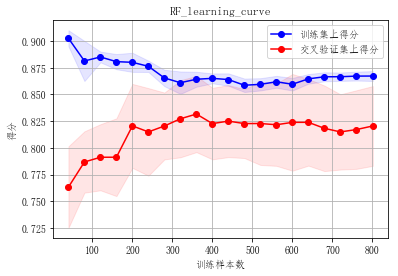

(0.8274653303830923, 0.08862298982688388)

In [91]:
# 绘制随机森林的学习曲线
clf_RF_opt2 = RandomForestClassifier(random_state=0, n_estimators=100,max_depth=8, min_samples_leaf=1,min_samples_split=5,max_features='sqrt',n_jobs=-1)
clf_RF_opt2.fit(X=X,y=y)
plot_learning_curve(estimator=clf_RF_opt2,title="RF_learning_curve",X=X,y=y)

In [93]:
# 获取测试集
X_test_df = test_df.filter(regex="Sex_.*|Pclass_.*|title_.*|Age_type_.*|Cabin_first_.*|Fare_bin_.*|family_type_.*")
X_test = X_test_df.values
predictions = clf_RF_opt2.predict(X_test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("RF_predictions_03.csv", index=False)